In [ ]:
from keras.datasets import reuters

In [ ]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=24000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [ ]:
decoded_newswire
 

'? generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [ ]:
train_labels[1000]

19

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension=24000):
    results = np.zeros((len(sequences), dimension))
     
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)

In [ ]:
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
print (train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
print (x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [ ]:
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
from keras import models

In [ ]:
from keras import layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(64, activation='relu', input_shape=(24000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

In [ ]:
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.6340 - accuracy: 0.2991 - val_loss: 2.6866 - val_accuracy: 0.5810
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 2.3012 - accuracy: 0.6211 - val_loss: 1.7072 - val_accuracy: 0.6550
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.4234 - accuracy: 0.7198 - val_loss: 1.2981 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0114 - accuracy: 0.7960 - val_loss: 1.1299 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 28ms/step - loss: 0.7792 - accuracy: 0.8343 - val_loss: 1.0228 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 0.5729 - accuracy: 0.8877 - val_loss: 0.9565 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 31ms/step - loss: 0.4368 - accuracy: 0.9136 - val_loss: 0.9279 - val_accuracy: 0.8070
Epoch 8/20
16

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(loss) + 1)

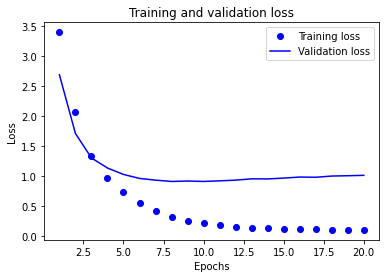

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.show()

In [ ]:
plt.clf()   # clear figure

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

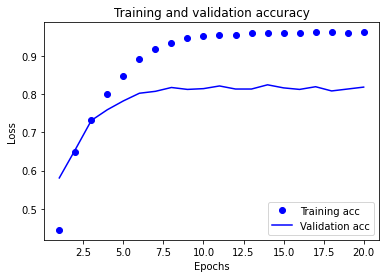

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.show()

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(64, activation='relu', input_shape=(24000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 1s 44ms/step - loss: 3.4907 - accuracy: 0.3903 - val_loss: 2.3831 - val_accuracy: 0.5460
Epoch 2/8
16/16 [==============================] - 0s 28ms/step - loss: 2.0250 - accuracy: 0.5930 - val_loss: 1.5543 - val_accuracy: 0.6710
Epoch 3/8
16/16 [==============================] - 0s 30ms/step - loss: 1.3239 - accuracy: 0.7258 - val_loss: 1.2621 - val_accuracy: 0.7240
Epoch 4/8
16/16 [==============================] - 0s 30ms/step - loss: 0.9802 - accuracy: 0.7910 - val_loss: 1.1125 - val_accuracy: 0.7700
Epoch 5/8
16/16 [==============================] - 0s 30ms/step - loss: 0.7288 - accuracy: 0.8418 - val_loss: 1.0191 - val_accuracy: 0.7930
Epoch 6/8
16/16 [==============================] - 0s 30ms/step - loss: 0.5485 - accuracy: 0.8886 - val_loss: 0.9577 - val_accuracy: 0.8090
Epoch 7/8
16/16 [==============================] - 0s 30ms/step - loss: 0.4298 - accuracy: 0.9139 - val_loss: 0.9234 - val_accuracy: 0.8090
Epoch 8/8
16/16 [===

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 0.9941 - accuracy: 0.7854


In [ ]:
results

[0.9940532445907593, 0.7853962779045105]

In [ ]:
import copy

In [ ]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.16874443455031166

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape
predictions[0]

array([5.0945571e-05, 8.6746091e-04, 2.4603162e-04, 8.5958499e-01,
       1.2263818e-01, 5.1753526e-05, 1.2563191e-04, 1.6985438e-04,
       3.7674806e-03, 1.2570585e-04, 1.3396730e-04, 1.2127258e-03,
       8.7472734e-05, 6.7262369e-04, 1.7938999e-04, 4.3494474e-05,
       3.0012106e-04, 5.0364452e-04, 4.1970881e-05, 1.0126622e-03,
       7.7150337e-04, 1.7530407e-03, 1.3983963e-05, 4.6652168e-04,
       7.2523122e-05, 1.8799874e-04, 5.3858792e-05, 2.1873024e-05,
       1.6121428e-04, 3.7073132e-04, 3.9632039e-04, 9.4531795e-05,
       1.6685703e-04, 4.1524891e-05, 2.3370239e-04, 2.9174350e-06,
       1.0751033e-03, 1.2551089e-05, 8.5839041e-05, 6.9470907e-04,
       3.8820384e-05, 1.2842887e-03, 1.1929670e-04, 4.4475626e-05,
       1.8270472e-05, 1.4205839e-06], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0])

3

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(24000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=40,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/40
63/63 [==============================] - 1s 13ms/step - loss: 3.5593 - accuracy: 0.0752 - val_loss: 2.4147 - val_accuracy: 0.5310
Epoch 2/40
63/63 [==============================] - 1s 9ms/step - loss: 2.0383 - accuracy: 0.5566 - val_loss: 1.6546 - val_accuracy: 0.6070
Epoch 3/40
63/63 [==============================] - 1s 9ms/step - loss: 1.4059 - accuracy: 0.6526 - val_loss: 1.4451 - val_accuracy: 0.6650
Epoch 4/40
63/63 [==============================] - 1s 9ms/step - loss: 1.1117 - accuracy: 0.7058 - val_loss: 1.3696 - val_accuracy: 0.6810
Epoch 5/40
63/63 [==============================] - 1s 9ms/step - loss: 0.9708 - accuracy: 0.7361 - val_loss: 1.3395 - val_accuracy: 0.6990
Epoch 6/40
63/63 [==============================] - 1s 9ms/step - loss: 0.8341 - accuracy: 0.7628 - val_loss: 1.3326 - val_accuracy: 0.7040
Epoch 7/40
63/63 [==============================] - 1s 9ms/step - loss: 0.7824 - accuracy: 0.7701 - val_loss: 1.3407 - val_accuracy: 0.7000
Epoch 8/40
63/63 [=